#Project 2 - Arrest Data

####Analyze NYPD arrest data:
1. Pick a subset of total dataset (ZIP code, neighborhood, district, etc.)
2. Pick a feature
3. Compare to a different entity

Include:
- descriptive statistics
- data cleaning
- visualizations


###Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Crime data URL
url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc'

In [8]:
# Importing data filtered from above website
# NOTE: Pre-filtered data before importing in order to decrease the size of the .csv files.
#       All .csv files include data from the 114th precinct in Queens (the precicnt that serves my neighborhood).
df_2019 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2019.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2020.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_Year_to_Date_2022.csv')

###Data Cleaning

In [9]:
# Columns match; seemingly big differences in number of arrests reported each year (2022 is only 9months)
print(f'2019: {df_2019.shape}\n2020: {df_2020.shape}\n2021: {df_2021.shape}\n2022: {df_2022.shape}')

2019: (3566, 19)
2020: (2659, 19)
2021: (3462, 19)
2022: (3023, 19)


In [11]:
list(df_2019.columns)

# Field names and explanations from dataset documentation:

# ARREST_KEY        = Unique ID
# ARREST_DATE       = date of reported event
# PD_CD             = internal classification code (granular)
# PD_DESC           = description of corresponding code
# KY_CD             = internal classification code (general)
# OFNS_DESC         = description of corresponding code
# LAW_CODE          = NYS Penal Law classification code
# LAW_CAT_CD        = level of offense (felony, misdemeanor, violation)
# ARREST_BORO       = prefiltered - Q(Queens) only
# ARREST_PRECINCT   = prefiltered - 114
# JURISDICTION_CODE = NYPD Jurisdictions (0-Patrol, 1-Transit, 2-Housing), Non-NYPD (3+)
# AGE_GROUP         = perpetrator's age
# PERP_SEX          = perpetrator's gender
# PERP_RACE         = perpetrator's race description
# X_COORD_CD        = NYS Plane Coordinate System
# Y_COORD_CD        = NYS Plane Coordinate System
# Latitude          = GCS, WGS 1984
# Longitude         = GCS, WGS 1984
# Lon_Lat           = concatenation of the previous 2 features

['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat']

In [12]:
# Created a list to loop through for repetitive tasks for each df
dfs = [df_2019, df_2020, df_2021, df_2022]

In [13]:
# Drop redundant columns
for df in dfs:
  df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [14]:
# Verify
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARREST_KEY         3566 non-null   int64  
 1   ARREST_DATE        3566 non-null   object 
 2   PD_CD              3566 non-null   int64  
 3   PD_DESC            3563 non-null   object 
 4   KY_CD              3563 non-null   float64
 5   OFNS_DESC          3563 non-null   object 
 6   LAW_CODE           3566 non-null   object 
 7   LAW_CAT_CD         3546 non-null   object 
 8   ARREST_BORO        3566 non-null   object 
 9   ARREST_PRECINCT    3566 non-null   int64  
 10  JURISDICTION_CODE  3566 non-null   int64  
 11  AGE_GROUP          3566 non-null   object 
 12  PERP_SEX           3566 non-null   object 
 13  PERP_RACE          3566 non-null   object 
 14  X_COORD_CD         3566 non-null   int64  
 15  Y_COORD_CD         3566 non-null   int64  
 16  Lon_Lat            3566 

####Key Feature - Age

In [15]:
df_2019['AGE_GROUP'].value_counts().sort_index()
# Let's move the last group into it's sequential position (at the top)

18-24     769
25-44    2051
45-64     574
65+        48
<18       124
Name: AGE_GROUP, dtype: int64

In [16]:
# Renaming '<18' to '1-18'
for df in dfs:
  df['AGE_GROUP'].replace('<18', '1-18', inplace=True)

In [17]:
# Verify
for df in dfs:
  print(df.AGE_GROUP.value_counts().sort_index())

1-18      124
18-24     769
25-44    2051
45-64     574
65+        48
Name: AGE_GROUP, dtype: int64
1-18       50
18-24     551
25-44    1502
45-64     521
65+        35
Name: AGE_GROUP, dtype: int64
1-18       47
18-24     677
25-44    2029
45-64     674
65+        35
Name: AGE_GROUP, dtype: int64
1-18       73
18-24     534
25-44    1890
45-64     491
65+        35
Name: AGE_GROUP, dtype: int64


###Descriptive Statistics

In [19]:
df_2019.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Lon_Lat
0,206009619,12/04/2019,440,NaN,NaN,NaN,PL 1553502,F,Q,114,0,1-18,M,WHITE,1009988,221743,POINT (-73.90707361899996 40.77528038400004)
1,194164531,03/01/2019,177,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,Q,114,0,25-44,M,BLACK,1007654,219564,POINT (-73.91550817999996 40.769306087000075)
2,203738719,10/15/2019,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,114,0,25-44,M,BLACK,1007694,219657,POINT (-73.91536344699995 40.769561242000066)


In [25]:
law_code_counts = df_2019['LAW_CODE'].value_counts()
law_code_counts[law_code_counts > 100]

PL 1200001    256
PL 1552500    245
PL 215510B    212
PL 1200000    161
VTL0511001    144
VTL051101A    130
Name: LAW_CODE, dtype: int64

###Visualizations

In [ ]:
# What is "New Georeferenced Column", where did "Year" go?

In [1]:
df.head(1)

NameError: ignored

In [ ]:
age_groups = list(df_2019['AGE_GROUP'].value_counts().sort_index().keys())

In [ ]:
age_groups

['1-18', '18-24', '25-44', '45-64', '65+']

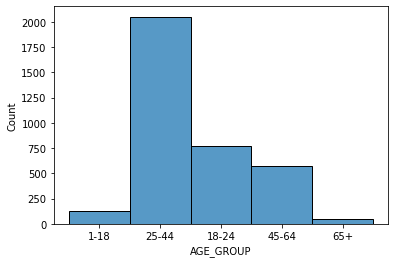

In [ ]:
sns.histplot(data=df_2019['AGE_GROUP']);

In [ ]:
# Concatenate 3 matching dataframes (2019, 2020, 2021)
df = pd.concat(dfs)

In [ ]:
# Add a 'YEAR' column for visualizations
df['YEAR'] = df['ARREST_DATE'].str.strip().str[-4:].astype(int)

In [ ]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         20
PD_DESC                        8
KY_CD                         26
OFNS_DESC                      8
LAW_CODE                       0
LAW_CAT_CD                   115
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Lon_Lat                     3023
New Georeferenced Column    9687
YEAR                           0
dtype: int64